# CandyParty task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from candy_party import CandyParty
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

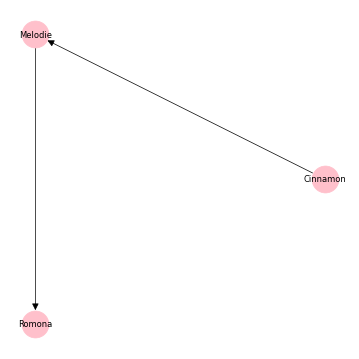


Causal context: A group of friends is going to a party where candies will be randomly distributed. Cinnamon will be happy if she gets at least 5 candies. Melodie will be happy if she gets at least 6 candies and Cinnamon is happy. Romona will be happy if she gets at least 6 candies or if Melodie is happy. 

Sample context:  After distributing the candies, Cinnamon gets 5 candies, Melodie gets 4 candies, and Romona gets 2 candies.

- Global cause-effect pairs: ('Cinnamon', 'Romona')
- Local cause-effect pairs: [('Cinnamon', 'Melodie'), ('Melodie', 'Romona')]
- Compositions: [[('Cinnamon', 'Melodie'), ('Melodie', 'Romona')]]
- Causal functions: ['or', 'and', 'or']


In [3]:
size = [2,2]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [4]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Romona': {'Prompt': 'Is Romona happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Cinnamon': 1, 'Melodie': 0, 'Romona': 0},
  'True exogenous': {'U8BP': 1, 'V0IY': 0, '6J4H': 0},
  'True response': 0},
 'Melodie': {'Prompt': 'Is Melodie happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Cinnamon': 1, 'Melodie': 0, 'Romona': 0},
  'True exogenous': {'U8BP': 1, 'V0IY': 0, '6J4H': 0},
  'True response': 0}}

In [5]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Cinnamon', 'Romona') --
Prompt: Now, suppose that Cinnamon is happy regardless of all other circumstances. With this new assumption, is Romona happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cinnamon': 1, 'Melodie': 0, 'Romona': 0}
True exogenous: {'U8BP': 1, 'V0IY': 0, '6J4H': 0}
True response: 0

-----------------------

-- ('Cinnamon', 'Melodie') --
Prompt: Now, suppose that Cinnamon is happy regardless of all other circumstances. With this new assumption, is Melodie happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cinnamon': 1, 'Melodie': 0, 'Romona': 0}
True exogenous: {'U8BP': 1, 'V0IY': 0, '6J4H': 0}
True response: 0

-----------------------

-- ('Melodie', 'Romona') --
Prompt: Now, suppose that Melodie is happy regardless of all other circumstances. With this new assumption, is Romona happy? Begin your response with Yes o

In [6]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Cinnamon', 'Romona') --
Prompt: Now, suppose that Cinnamon is not happy regardless of all other circumstances. With this new assumption, is Romona happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cinnamon': 0, 'Melodie': 0, 'Romona': 0}
True exogenous: {'U8BP': 1, 'V0IY': 0, '6J4H': 0}
True response: 0

-----------------------

-- ('Cinnamon', 'Melodie') --
Prompt: Now, suppose that Cinnamon is not happy regardless of all other circumstances. With this new assumption, is Melodie happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cinnamon': 0, 'Melodie': 0, 'Romona': 0}
True exogenous: {'U8BP': 1, 'V0IY': 0, '6J4H': 0}
True response: 0

-----------------------

-- ('Melodie', 'Romona') --
Prompt: Now, suppose that Melodie is not happy regardless of all other circumstances. With this new assumption, is Romona happy? Begin your respon

In [7]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Cinnamon,Melodie,Romona
0,1,1,1
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


,U8BP,V0IY,6J4H
0,1,1,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [8]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Melodie = 1 --


,Cinnamon,Melodie,Romona
0,1,1,1
1,1,1,1
2,0,1,1
3,0,1,1
4,0,1,1


,U8BP,V0IY,6J4H
0,1,1,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0



-- Cinnamon = 1 --


,Cinnamon,Melodie,Romona
0,1,1,1
1,1,0,0
2,1,0,0
3,1,1,1
4,1,1,1


,U8BP,V0IY,6J4H
0,1,1,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [9]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Melodie = 0 --


,Cinnamon,Melodie,Romona
0,1,0,1
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


,U8BP,V0IY,6J4H
0,1,1,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0



-- Cinnamon = 0 --


,Cinnamon,Melodie,Romona
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


,U8BP,V0IY,6J4H
0,1,1,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0


## Error test (moderate complexity)

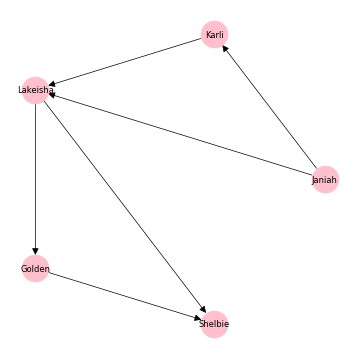


Causal context: A group of friends is going to a party where candies will be randomly distributed. Janiah will be happy if she gets at least 5 candies. Karli will be happy if she gets at least 4 candies or if Janiah is happy. Lakeisha will be happy if she gets at least 8 candies and Janiah is happy and Karli is happy. Golden will be happy if she gets at least 5 candies or if Lakeisha is happy. Shelbie will be happy if she gets at least 5 candies or if Lakeisha is happy or if Golden is happy. 

Sample context:  After distributing the candies, Janiah gets 7 candies, Karli gets 4 candies, Lakeisha gets 8 candies, Golden gets 3 candies, and Shelbie gets 4 candies.

- Global cause-effect pairs: ('Janiah', 'Shelbie')
- Local cause-effect pairs: [('Janiah', 'Lakeisha'), ('Lakeisha', 'Shelbie')]
- Compositions: [[('Janiah', 'Lakeisha'), ('Lakeisha', 'Shelbie')]]
- Causal functions: ['and', 'or', 'and', 'or', 'or']


In [10]:
size = [3,3]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [11]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Shelbie': {'Prompt': 'Is Shelbie happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Janiah': 1,
   'Karli': 1,
   'Lakeisha': 1,
   'Golden': 1,
   'Shelbie': 1},
  'True exogenous': {'4KMZ': 1, 'ATJ2': 1, 'NXLC': 1, 'MC2S': 0, '257B': 0},
  'True response': 1},
 'Lakeisha': {'Prompt': 'Is Lakeisha happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Janiah': 1,
   'Karli': 1,
   'Lakeisha': 1,
   'Golden': 1,
   'Shelbie': 1},
  'True exogenous': {'4KMZ': 1, 'ATJ2': 1, 'NXLC': 1, 'MC2S': 0, '257B': 0},
  'True response': 1}}

In [12]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Janiah', 'Shelbie') --
Prompt: Now, suppose that Janiah is happy regardless of all other circumstances. With this new assumption, is Shelbie happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Janiah': 1, 'Karli': 1, 'Lakeisha': 1, 'Golden': 1, 'Shelbie': 1}
True exogenous: {'4KMZ': 1, 'ATJ2': 1, 'NXLC': 1, 'MC2S': 0, '257B': 0}
True response: 1

-----------------------

-- ('Janiah', 'Lakeisha') --
Prompt: Now, suppose that Janiah is happy regardless of all other circumstances. With this new assumption, is Lakeisha happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Janiah': 1, 'Karli': 1, 'Lakeisha': 1, 'Golden': 1, 'Shelbie': 1}
True exogenous: {'4KMZ': 1, 'ATJ2': 1, 'NXLC': 1, 'MC2S': 0, '257B': 0}
True response: 1

-----------------------

-- ('Lakeisha', 'Shelbie') --
Prompt: Now, suppose that Lakeisha is happy regardless of all o

In [13]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Janiah', 'Shelbie') --
Prompt: Now, suppose that Janiah is not happy regardless of all other circumstances. With this new assumption, is Shelbie happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Janiah': 0, 'Karli': 1, 'Lakeisha': 0, 'Golden': 0, 'Shelbie': 0}
True exogenous: {'4KMZ': 1, 'ATJ2': 1, 'NXLC': 1, 'MC2S': 0, '257B': 0}
True response: 0

-----------------------

-- ('Janiah', 'Lakeisha') --
Prompt: Now, suppose that Janiah is not happy regardless of all other circumstances. With this new assumption, is Lakeisha happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Janiah': 0, 'Karli': 1, 'Lakeisha': 0, 'Golden': 0, 'Shelbie': 0}
True exogenous: {'4KMZ': 1, 'ATJ2': 1, 'NXLC': 1, 'MC2S': 0, '257B': 0}
True response: 0

-----------------------

-- ('Lakeisha', 'Shelbie') --
Prompt: Now, suppose that Lakeisha is not happy regard

In [14]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Janiah,Karli,Lakeisha,Golden,Shelbie
0,1,1,1,1,1
1,1,1,1,1,1
2,0,1,0,0,1
3,0,0,0,1,1
4,0,0,0,1,1


,4KMZ,ATJ2,NXLC,MC2S,257B
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0


In [15]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Janiah = 1 --


,Janiah,Karli,Lakeisha,Golden,Shelbie
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,0,1,1
4,1,1,1,1,1


,4KMZ,ATJ2,NXLC,MC2S,257B
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0



-- Lakeisha = 1 --


,Janiah,Karli,Lakeisha,Golden,Shelbie
0,1,1,1,1,1
1,1,1,1,1,1
2,0,1,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


,4KMZ,ATJ2,NXLC,MC2S,257B
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0


In [16]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Janiah = 0 --


,Janiah,Karli,Lakeisha,Golden,Shelbie
0,0,0,0,1,1
1,0,1,0,0,0
2,0,1,0,0,1
3,0,0,0,1,1
4,0,0,0,1,1


,4KMZ,ATJ2,NXLC,MC2S,257B
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0



-- Lakeisha = 0 --


,Janiah,Karli,Lakeisha,Golden,Shelbie
0,1,1,0,1,1
1,1,1,0,0,0
2,0,1,0,0,1
3,0,0,0,1,1
4,0,0,0,1,1


,4KMZ,ATJ2,NXLC,MC2S,257B
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0


In [17]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

[('Janiah', 'Shelbie')]
[('Janiah', 'Lakeisha'), ('Lakeisha', 'Shelbie')]
[[('Janiah', 'Lakeisha'), ('Lakeisha', 'Shelbie')]]


In [18]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,1,1,1,1,1,1
3,1,1,0,1,1,1
4,1,1,1,1,1,1



-- ('Janiah', 'Shelbie') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,1,0,1,1,0
4,1,1,1,1,1,0



-- ('Janiah', 'Lakeisha') | n = 5 --
-- PNS = 0.8 | ATE = 0.8 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,0,1,1,1,1,1
3,0,0,1,1,1,1
4,0,0,1,1,1,1



-- ('Lakeisha', 'Shelbie') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,0,0,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Janiah', 'Shelbie') | n = 10 --
-- PNS = 0.3 | ATE = 0.30000000000000004 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,0,0,1,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0



-- ('Janiah', 'Lakeisha') | n = 10 --
-- PNS = 0.9 | ATE = 0.9 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,1,1,1,1,1
3,0,1,1,1,1,1
4,0,1,1,1,1,1



-- ('Lakeisha', 'Shelbie') | n = 10 --
-- PNS = 0.3 | ATE = 0.30000000000000004 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,0,1,1,1
2,1,1,0,0,0,0
3,1,1,0,1,1,1
4,1,1,1,1,1,1



-- ('Janiah', 'Shelbie') | n = 50 --
-- PNS = 0.18 | ATE = 0.17999999999999994 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,0,1,1,0
2,1,1,0,0,0,0
3,1,1,0,1,1,0
4,1,1,1,1,1,0



-- ('Janiah', 'Lakeisha') | n = 50 --
-- PNS = 0.72 | ATE = 0.72 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,0,1,1,1,0
3,0,1,1,1,1,1
4,0,0,1,1,1,1



-- ('Lakeisha', 'Shelbie') | n = 50 --
-- PNS = 0.24 | ATE = 0.24 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,0,1,1,1



-- ('Janiah', 'Shelbie') | n = 100 --
-- PNS = 0.22 | ATE = 0.21999999999999997 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,1,1,1,1,0
4,1,1,0,1,1,0



-- ('Janiah', 'Lakeisha') | n = 100 --
-- PNS = 0.83 | ATE = 0.83 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,0,1,1,1,1,1
3,0,1,1,1,1,1
4,0,1,1,1,1,1



-- ('Lakeisha', 'Shelbie') | n = 100 --
-- PNS = 0.27 | ATE = 0.27 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,0,1,1,1



-- ('Janiah', 'Shelbie') | n = 500 --
-- PNS = 0.188 | ATE = 0.18799999999999994 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,1,1,1,1,0
4,1,1,0,1,1,0



-- ('Janiah', 'Lakeisha') | n = 500 --
-- PNS = 0.772 | ATE = 0.772 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,0,0,1,1,1,1
3,0,0,1,1,1,1
4,0,1,1,1,1,1



-- ('Lakeisha', 'Shelbie') | n = 500 --
-- PNS = 0.226 | ATE = 0.22599999999999998 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,0,0,0,0
3,1,1,1,1,1,1
4,1,1,0,1,1,1



-- ('Janiah', 'Shelbie') | n = 1000 --
-- PNS = 0.201 | ATE = 0.20099999999999996 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,0,0,0,0
3,1,1,1,1,1,0
4,1,1,0,1,1,0



-- ('Janiah', 'Lakeisha') | n = 1000 --
-- PNS = 0.804 | ATE = 0.804 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,0,1,1,1,0
3,0,0,1,1,1,1
4,0,1,1,1,1,1



-- ('Lakeisha', 'Shelbie') | n = 1000 --
-- PNS = 0.257 | ATE = 0.257 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,0
4,1,1,0,0,0,0



-- ('Janiah', 'Shelbie') | n = 5000 --
-- PNS = 0.2082 | ATE = 0.20819999999999994 --


,Janiah,Karli,True (cause = True),Golden,Shelbie,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,1,1,1,1,0
4,1,1,0,0,0,0



-- ('Janiah', 'Lakeisha') | n = 5000 --
-- PNS = 0.8056 | ATE = 0.8056 --


,Janiah,Karli,Lakeisha,Golden,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,0,1,1,1,1
3,0,0,1,1,1,0
4,0,1,1,1,1,0



-- ('Lakeisha', 'Shelbie') | n = 5000 --
-- PNS = 0.2532 | ATE = 0.2532 --


In [19]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)


-- n = 5 --
Global PNS  = 0.2
Composition = 0.16000000000000003

-- n = 10 --
Global PNS  = 0.3
Composition = 0.27

-- n = 50 --
Global PNS  = 0.18
Composition = 0.17279999999999998

-- n = 100 --
Global PNS  = 0.22
Composition = 0.2241

-- n = 500 --
Global PNS  = 0.188
Composition = 0.17447200000000002

-- n = 1000 --
Global PNS  = 0.201
Composition = 0.206628

-- n = 5000 --
Global PNS  = 0.2082
Composition = 0.20397791999999998


In [20]:
results_dict

{5: {('Janiah', 'Shelbie'): 0.2,
  ('Janiah', 'Lakeisha'): 0.8,
  ('Lakeisha', 'Shelbie'): 0.2},
 10: {('Janiah', 'Shelbie'): 0.3,
  ('Janiah', 'Lakeisha'): 0.9,
  ('Lakeisha', 'Shelbie'): 0.3},
 50: {('Janiah', 'Shelbie'): 0.18,
  ('Janiah', 'Lakeisha'): 0.72,
  ('Lakeisha', 'Shelbie'): 0.24},
 100: {('Janiah', 'Shelbie'): 0.22,
  ('Janiah', 'Lakeisha'): 0.83,
  ('Lakeisha', 'Shelbie'): 0.27},
 500: {('Janiah', 'Shelbie'): 0.188,
  ('Janiah', 'Lakeisha'): 0.772,
  ('Lakeisha', 'Shelbie'): 0.226},
 1000: {('Janiah', 'Shelbie'): 0.201,
  ('Janiah', 'Lakeisha'): 0.804,
  ('Lakeisha', 'Shelbie'): 0.257},
 5000: {('Janiah', 'Shelbie'): 0.2082,
  ('Janiah', 'Lakeisha'): 0.8056,
  ('Lakeisha', 'Shelbie'): 0.2532}}

## Error test (high complexity)

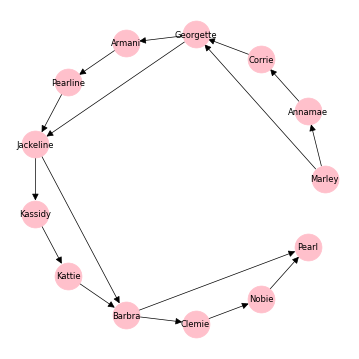


Causal context: A group of friends is going to a party where candies will be randomly distributed. Marley will be happy if she gets at least 8 candies. Annamae will be happy if she gets at least 5 candies and Marley is happy. Corrie will be happy if she gets at least 8 candies or if Annamae is happy. Georgette will be happy if she gets at least 4 candies and Marley is happy and Corrie is happy. Armani will be happy if she gets at least 6 candies and Georgette is happy. Pearline will be happy if she gets at least 6 candies or if Armani is happy. Jackeline will be happy if she gets at least 7 candies and Georgette is happy and Pearline is happy. Kassidy will be happy if she gets at least 6 candies or if Jackeline is happy. Kattie will be happy if she gets at least 6 candies or if Kassidy is happy. Barbra will be happy if she gets at least 5 candies or if Jackeline is happy or if Kattie is happy. Clemie will be happy if she gets at least 5 candies or if Barbra is happy. Nobie will be hap

In [21]:
size = [4,4,4,4]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

## Generate dataset

In [22]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# w replicates per sample.
# = x*y*z*w subtasks.
graph_sizes = [[5,5,5]]
n_tasks_per_size = 1
n_samples_per_task = 5000
reps_per_sample = None
bcc_type = "wheel"

df = dg.get_dataset(task_generator = CandyParty,
                    graph_sizes = graph_sizes,
                    bcc_type = bcc_type,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task, 
                    reps_per_sample = reps_per_sample)

display(df)

,Task ID,Context ID,Sample ID,Nodes per BCC,DAG adjacency matrix,DAG nodes,CCT adjacency matrix,CCT nodes,Exogenous variables,Bernoulli parameters,Global quantity,Local quantities,Compositions,Causal context,Sample context,Factual queries,Interventional queries (cause = True),Interventional queries (cause = False)
0,0.0,0,0,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Lorayne, Desiree, Jalynn, Beulah, Karina, Ann...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Lorayne, Karina, Porsche, Tempie]","[H3D8, HMHY, BU3M, LRQR, 4EJW, Z13H, A9TY, 6LB...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Lorayne, Tempie)","[(Lorayne, Karina), (Lorayne, Porsche), (Karin...","[[(Lorayne, Karina), (Karina, Porsche), (Porsc...",A group of friends is going to a party where c...,"After distributing the candies, Lorayne gets ...",{'Tempie': {'Prompt': 'Is Tempie happy? Begin ...,"{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo...","{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo..."
1,0.1,0,1,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Lorayne, Desiree, Jalynn, Beulah, Karina, Ann...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Lorayne, Karina, Porsche, Tempie]","[H3D8, HMHY, BU3M, LRQR, 4EJW, Z13H, A9TY, 6LB...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Lorayne, Tempie)","[(Lorayne, Karina), (Lorayne, Porsche), (Karin...","[[(Lorayne, Karina), (Karina, Porsche), (Porsc...",A group of friends is going to a party where c...,"After distributing the candies, Lorayne gets ...",{'Tempie': {'Prompt': 'Is Tempie happy? Begin ...,"{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo...","{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo..."
2,0.2,0,2,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Lorayne, Desiree, Jalynn, Beulah, Karina, Ann...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Lorayne, Karina, Porsche, Tempie]","[H3D8, HMHY, BU3M, LRQR, 4EJW, Z13H, A9TY, 6LB...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Lorayne, Tempie)","[(Lorayne, Karina), (Lorayne, Porsche), (Karin...","[[(Lorayne, Karina), (Karina, Porsche), (Porsc...",A group of friends is going to a party where c...,"After distributing the candies, Lorayne gets ...",{'Tempie': {'Prompt': 'Is Tempie happy? Begin ...,"{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo...","{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo..."
3,0.3,0,3,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Lorayne, Desiree, Jalynn, Beulah, Karina, Ann...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Lorayne, Karina, Porsche, Tempie]","[H3D8, HMHY, BU3M, LRQR, 4EJW, Z13H, A9TY, 6LB...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Lorayne, Tempie)","[(Lorayne, Karina), (Lorayne, Porsche), (Karin...","[[(Lorayne, Karina), (Karina, Porsche), (Porsc...",A group of friends is going to a party where c...,"After distributing the candies, Lorayne gets ...",{'Tempie': {'Prompt': 'Is Tempie happy? Begin ...,"{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo...","{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo..."
4,0.4,0,4,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Lorayne, Desiree, Jalynn, Beulah, Karina, Ann...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Lorayne, Karina, Porsche, Tempie]","[H3D8, HMHY, BU3M, LRQR, 4EJW, Z13H, A9TY, 6LB...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Lorayne, Tempie)","[(Lorayne, Karina), (Lorayne, Porsche), (Karin...","[[(Lorayne, Karina), (Karina, Porsche), (Porsc...",A group of friends is going to a party where c...,"After distributing the candies, Lorayne gets ...",{'Tempie': {'Prompt': 'Is Tempie happy? Begin ...,"{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo...","{('Lorayne', 'Tempie'): {'Prompt': 'Now, suppo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.4995,0,4995,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Lorayne, Desiree, Jalynn, Beulah,

In [23]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

,Task ID,Context ID,Sample ID,Nodes per BCC,Effect,Context,Question,True
0,0.0,0,0,"[5, 5, 5]",Tempie,A group of friends is going to a party where c...,Is Tempie happy? Begin your response with Yes ...,1
1,0.0,0,0,"[5, 5, 5]",Karina,A group of friends is going to a party where c...,Is Karina happy? Begin your response with Yes ...,1
2,0.0,0,0,"[5, 5, 5]",Porsche,A group of friends is going to a party where c...,Is Porsche happy? Begin your response with Yes...,1
3,0.1,0,1,"[5, 5, 5]",Tempie,A group of friends is going to a party where c...,Is Tempie happy? Begin your response with Yes ...,0
4,0.1,0,1,"[5, 5, 5]",Karina,A group of friends is going to a party where c...,Is Karina happy? Begin your response with Yes ...,1
...,...,...,...,...,...,...,...,...
14995,0.4998,0,4998,"[5, 5, 5]",Karina,A group of friends is going to a party where c...,Is Karina happy? Begin your response with Yes ...,1
14996,0.4998,0,4998,"[5, 5, 5]",Porsche,A group of friends is going to a party where c...,Is Porsche happy? Begin your response with Yes...,1
14997,0.4999,0,4999,"[5, 5, 5]",Tempie,A group of friends is going to a party where c...,Is Tempie happy? Begin your response with Yes ...,1
14998,0.4999,0,4999,"[5, 5, 5]",Karina,A group of friends is going to a party where c...,Is Karina happy? Begin your response with Yes ...,1


,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[5, 5, 5]","(Lorayne, Tempie)",Lorayne,Tempie,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
1,0.0,0,0,"[5, 5, 5]","(Lorayne, Karina)",Lorayne,Karina,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
2,0.0,0,0,"[5, 5, 5]","(Lorayne, Porsche)",Lorayne,Porsche,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
3,0.0,0,0,"[5, 5, 5]","(Karina, Porsche)",Karina,Porsche,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
4,0.0,0,0,"[5, 5, 5]","(Karina, Tempie)",Karina,Tempie,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.4999,0,4999,"[5, 5, 5]","(Lorayne, Karina)",Lorayne,Karina,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
29996,0.4999,0,4999,"[5, 5, 5]","(Lorayne, Porsche)",Lorayne,Porsche,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
29997,0.4999,0,4999,"[5, 5, 5]","(Karina, Porsche)",Karina,Porsche,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
29998,0.4999,0,4999,"[5, 5, 5]","(Karina, Tempie)",Karina,Tempie,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1


In [24]:
df_factual["True"].value_counts()

True
1    13134
0     1866
Name: count, dtype: int64

In [25]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

-- PNS = 0.0044 | ATE = 0.0044000000000000705 --
-- PNS = 0.0344 | ATE = 0.034399999999999986 --
-- PNS = 0.0078 | ATE = 0.007800000000000029 --
-- PNS = 0.2492 | ATE = 0.24919999999999998 --
-- PNS = 0.1628 | ATE = 0.16280000000000006 --
-- PNS = 0.6398 | ATE = 0.6398 --


{0: {"('Lorayne', 'Tempie')": 0.0044,
  "('Lorayne', 'Karina')": 0.0344,
  "('Lorayne', 'Porsche')": 0.0078,
  "('Karina', 'Porsche')": 0.2492,
  "('Karina', 'Tempie')": 0.1628,
  "('Porsche', 'Tempie')": 0.6398,
  "[('Lorayne', 'Karina'), ('Karina', 'Porsche'), ('Porsche', 'Tempie')]": 0.005484672704,
  "[('Lorayne', 'Karina'), ('Karina', 'Tempie')]": 0.00560032,
  "[('Lorayne', 'Porsche'), ('Porsche', 'Tempie')]": 0.00499044}}

In [26]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.1)
threshold_dict

{0: {"[('Lorayne', 'Karina'), ('Karina', 'Porsche'), ('Porsche', 'Tempie')]": 0.271168176,
  "[('Lorayne', 'Karina'), ('Karina', 'Tempie')]": 0.3000799999999999,
  "[('Lorayne', 'Porsche'), ('Porsche', 'Tempie')]": 0.14760999999999985}}

In [27]:
df_cf[df_cf["Context ID"] == 0]

,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[5, 5, 5]","(Lorayne, Tempie)",Lorayne,Tempie,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
1,0.0,0,0,"[5, 5, 5]","(Lorayne, Karina)",Lorayne,Karina,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
2,0.0,0,0,"[5, 5, 5]","(Lorayne, Porsche)",Lorayne,Porsche,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
3,0.0,0,0,"[5, 5, 5]","(Karina, Porsche)",Karina,Porsche,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
4,0.0,0,0,"[5, 5, 5]","(Karina, Tempie)",Karina,Tempie,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.4999,0,4999,"[5, 5, 5]","(Lorayne, Karina)",Lorayne,Karina,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
29996,0.4999,0,4999,"[5, 5, 5]","(Lorayne, Porsche)",Lorayne,Porsche,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
29997,0.4999,0,4999,"[5, 5, 5]","(Karina, Porsche)",Karina,Porsche,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
29998,0.4999,0,4999,"[5, 5, 5]","(Karina, Tempie)",Karina,Tempie,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1


In [28]:
df_cf[df_cf["Task ID"] == "0.0"]

,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[5, 5, 5]","(Lorayne, Tempie)",Lorayne,Tempie,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
1,0.0,0,0,"[5, 5, 5]","(Lorayne, Karina)",Lorayne,Karina,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
2,0.0,0,0,"[5, 5, 5]","(Lorayne, Porsche)",Lorayne,Porsche,A group of friends is going to a party where c...,"Now, suppose that Lorayne is happy regardless ...",1,"Now, suppose that Lorayne is not happy regardl...",1
3,0.0,0,0,"[5, 5, 5]","(Karina, Porsche)",Karina,Porsche,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
4,0.0,0,0,"[5, 5, 5]","(Karina, Tempie)",Karina,Tempie,A group of friends is going to a party where c...,"Now, suppose that Karina is happy regardless o...",1,"Now, suppose that Karina is not happy regardle...",1
5,0.0,0,0,"[5, 5, 5]","(Porsche, Tempie)",Porsche,Tempie,A group of friends is going to a party where c...,"Now, suppose that Porsche is happy regardless ...",1,"Now, suppose that Porsche is not happy regardl...",0


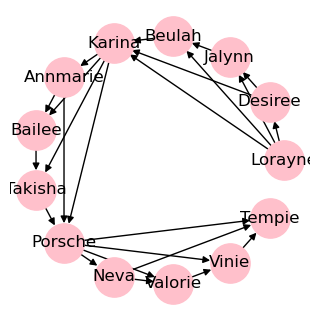

In [29]:
#array_string = df[df["Task ID"] == "0.0"]["DAG adjacency matrix"][0]
names = df[df["Task ID"] == "0.0"]["DAG nodes"][0]
#adj = u.string_to_array(array_string)
adj = df[df["Task ID"] == "0.0"]["DAG adjacency matrix"][0]
u.plot_nx(adj, labels = names, figsize = (3,3), dpi = 100)

In [30]:
print(df_cf[df_cf["Task ID"] == "0.0"]["Context"][0])

A group of friends is going to a party where candies will be randomly distributed. Lorayne will be happy if she gets at least 7 candies. Desiree will be happy if she gets at least 5 candies and Lorayne is happy. Jalynn will be happy if she gets at least 4 candies or if Lorayne is happy or if Desiree is happy. Beulah will be happy if she gets at least 8 candies or if Lorayne is happy or if Jalynn is happy. Karina will be happy if she gets at least 7 candies or if Lorayne is happy or if Desiree is happy or if Beulah is happy. Annmarie will be happy if she gets at least 5 candies or if Karina is happy. Bailee will be happy if she gets at least 7 candies and Karina is happy and Annmarie is happy. Takisha will be happy if she gets at least 4 candies and Karina is happy and Bailee is happy. Porsche will be happy if she gets at least 5 candies or if Karina is happy or if Annmarie is happy or if Takisha is happy. Neva will be happy if she gets at least 8 candies and Porsche is happy. Valorie w

## End of document